In [17]:
#Import requried libraries 
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Flatten, Dense, Dropout, MaxPooling2D
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

In [2]:
#Checking version of tensorflow
tf.__version__

'2.7.0'

In [60]:
#Getting Data 
path = "./Data/train/"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/.255,
                                  zoom_range=0.2,
                                  validation_split=0.1)

In [61]:
train_data = train_datagen.flow_from_directory(directory=path,
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                              subset="training",
                                              color_mode="grayscale",
                                              seed=42) #set as training data

test_data = train_datagen.flow_from_directory(directory=path,
                                            target_size=(224, 224),
                                            class_mode="categorical",
                                              color_mode="grayscale",
                                            subset="validation",
                                             seed=42)

Found 315 images belonging to 7 classes.
Found 35 images belonging to 7 classes.


In [62]:
class_size = len(train_data.class_indices)

In [63]:
model = Sequential([
    Convolution2D(32, (3, 3), input_shape=(224, 224, 1), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=class_size, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 7)                

In [65]:
history_1 = model.fit(train_data,
         epochs=5,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 20s 2s/step - loss: 3042.3909 - accuracy: 0.1556 - val_loss: 143.8886 - val_accuracy: 0.2286
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 46.4662 - accuracy: 0.4603 - val_loss: 1.5574 - val_accuracy: 0.8286
Epoch 3/5
10/10 [==============================] - 18s 2s/step - loss: 1.0396 - accuracy: 0.8667 - val_loss: 0.4514 - val_accuracy: 0.9429
Epoch 4/5
10/10 [==============================] - 17s 2s/step - loss: 0.2077 - accuracy: 0.9492 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 18s 2s/step - loss: 0.0688 - accuracy: 0.9873 - val_loss: 0.0026 - val_accuracy: 1.0000


In [66]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-01 02:37:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-01 02:37:12 (20.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [90]:
from helper_function_2 import plot_loss_curves, load_and_prep_image, pred_and_plot

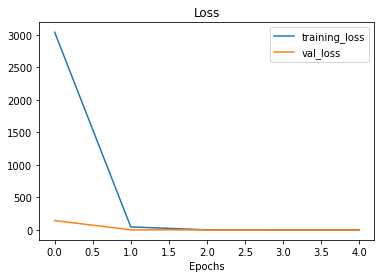

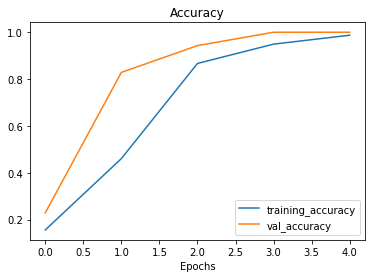

In [68]:
plot_loss_curves(history_1)

In [69]:
evaluation_test = model.evaluate(test_data)

2/2 [==============================] - 1s 75ms/step - loss: 0.4851 - accuracy: 0.8857


In [70]:
if not os.path.exists("./Models"):
    os.mkdir("./Models")
model.save("Models/model_1.h5")

In [71]:
load_model = tf.keras.models.load_model("./Models/model_1.h5")
evaluation_load_model = load_model.evaluate(test_data)

2/2 [==============================] - 1s 71ms/step - loss: 0.1369 - accuracy: 0.9714


In [72]:
from helper_functions import preprocess_img_path

In [81]:
img = load_and_prep_image("./Data/A/0.jpg")
# img = preprocess_img_path("./Data/A/0.jpg")

In [82]:
img 

<tf.Tensor: shape=(224, 224, 1), dtype=float32, numpy=
array([[[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.984121  ],
        [0.98656356],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.997129  ],
        [0.99757063],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       ...,

       [[0.99452025],
        [0.99827534],
        [1.        ],
        ...,
        [0.9800019 ],
        [0.98361826],
        [1.        ]],

       [[1.        ],
        [0.9995141 ],
        [0.9996281 ],
        ...,
        [0.98640597],
        [0.9902226 ],
        [1.        ]],

       [[1.        ],
        [0.99731266],
        [0.9979429 ],
        ...,
        [0.9958857 ],
        [0.99462545],
        [1.        ]]], dtype=float32)>

In [80]:
# img = preprocess_img_path("./Data/A/0.jpg")
# img_final = tf.cast(img, tf.float32) / 255.0
# img = img_final
# # img

<tf.Tensor: shape=(224, 224), dtype=float32, numpy=
array([[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [1.       , 1.       , 0.5254902, ..., 0.6666667, 1.       ,
        1.       ],
       [1.       , 1.       , 0.5254902, ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 0.5254902, ..., 1.       , 1.       ,
        1.       ]], dtype=float32)>

In [88]:
model.predict(tf.expand_dims(img, axis=0)).argmax()

6

In [96]:
classes = list(train_data.class_indices.keys())

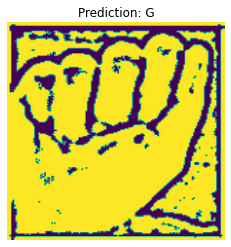

In [115]:
pred_and_plot(model, filename="./Data/A/39.jpg", class_names=classes)

TensorShape([224, 224, 1])

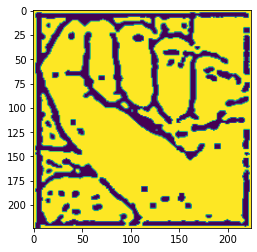

In [127]:
img = preprocess_img_path("./Data/A/1.jpg")
img = tf.constant(img, dtype=tf.float32, shape=(224, 224, 1))
img = img / 255.0
plt.imshow(img)
img.shape

In [130]:
model.predict(tf.expand_dims(img, axis=0)).argmax()

6

In [132]:
model_2 = Sequential([
    Convolution2D(32, (3, 3), input_shape=(224, 224, 1), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"),
    Dropout(0.40),
    Dense(units=96, activation="relu"),
    Dropout(0.40),
    Dense(units=64, activation="relu"),
    Dense(units=class_size, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [133]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 93312)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [134]:
history_2 = model_2.fit(train_data,
         epochs=5,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 18s 2s/step - loss: 2407.5879 - accuracy: 0.1714 - val_loss: 93.7839 - val_accuracy: 0.1429
Epoch 2/5
10/10 [==============================] - 16s 2s/step - loss: 56.2014 - accuracy: 0.2127 - val_loss: 1.4591 - val_accuracy: 0.4857
Epoch 3/5
10/10 [==============================] - 15s 2s/step - loss: 4.3170 - accuracy: 0.2349 - val_loss: 1.0768 - val_accuracy: 0.6857
Epoch 4/5
10/10 [==============================] - 15s 1s/step - loss: 1.8232 - accuracy: 0.3619 - val_loss: 1.3679 - val_accuracy: 0.6857
Epoch 5/5
10/10 [==============================] - 15s 2s/step - loss: 1.5665 - accuracy: 0.3905 - val_loss: 1.0803 - val_accuracy: 0.7429


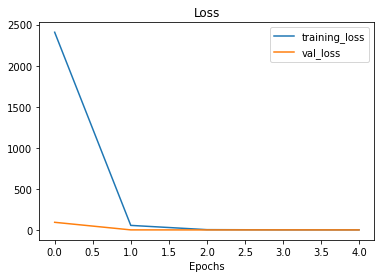

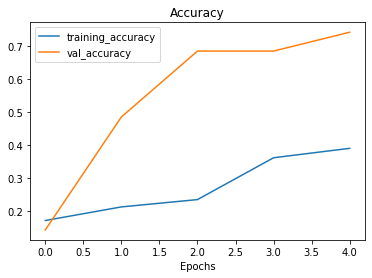

In [135]:
plot_loss_curves(history_2)

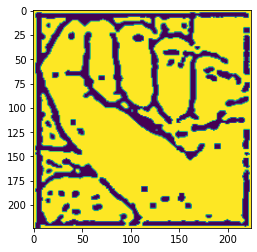

In [136]:
img = preprocess_img_path("./Data/A/1.jpg")
img = tf.constant(img, dtype=tf.float32, shape=(224, 224, 1))
img = img / 255.0
plt.imshow(img)

In [138]:
model_2.predict(tf.expand_dims(img, axis=0)).argmax()

6

In [146]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

45.0